# assignment 2

Første del er omkring gennemsnitligt forbrug for forskellige indkomstgrupper / indtægtsgrupper 
Tænker at anden del så kan være om forbrugerprisindekset - altså købekraftspariteten, og så kan man sammenligne på den måde, om forbruget i de forskellige grupper har været ramt 


In [50]:
#loader de forskellige pakker
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

#og loader The DST API wrapper 
# installeret %pip install git+https://github.com/alemartinello/dstapi

#og nu downloades a package 'a wrapper for multiple APIs' with a pandas interface
# installeret %pip install pandas-datareader

import datetime #gør at vi kan håndterer datoer 
import pandas_datareader
from dstapi import DstApi

#importer mulighed for at lave venn diagrammer
#%pip install matplotlib-venn
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import plotly.graph_objects as go


Importerer data direkte fra Danmarks Statistik, tabel FU04, der vedrører husholdningernes forbrug, opdelt efter "hvilken klasse" de arbejder i, eller ikke arbejder i

In [12]:
#importer data fra DST
ind = DstApi('FU04') 
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table FU04: Consumption by group of consumption, socioeconomic status, price unit and time
Last update: 2023-03-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KONSUMGRP,47,1000,CONSUMPTION TOTAL,127000,12.7 Other services n.e.c.,False
1,SOCIO,9,2001,Average Households,3080,Other not economically active,False
2,PRISENHED,2,AARPRIS,Current prices,08PRIS,Real prices,False
3,Tid,28,1994,1994,2021,2021,True


Alt data og variable bliver printet, så man kan se DATA ID

In [13]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

KONSUMGRP:


,id,text
0,1000,CONSUMPTION TOTAL
1,011000,01.1 Food
2,012000,01.2 Non-alcoholic beverages
3,021000,02.1 Alcoholic beverages
4,022000,02.2 Tobacco
5,023000,02.3 Narcotics
6,031000,03.1 Clothing
7,032000,03.2 Footwear
8,041000,04.1 Actual rentals for housing
9,042000,04.2 Imputed rentals for housing


SOCIO:


,id,text
0,2001,Average Households
1,3010,Selfemployed
2,3020,Employees - upper level
3,3030,Employees - medium level
4,3040,Employees - basic level
5,3050,Unemployed
6,3060,Receiving education
7,3070,Pensioners and early retirement
8,3080,Other not economically active


PRISENHED:


,id,text
0,AARPRIS,Current prices
1,08PRIS,Real prices


Tid:


,id,text
0,1994,1994
1,1995,1995
2,1996,1996
3,1997,1997
4,1998,1998
5,1999,1999
6,2000,2000
7,2001,2001
8,2002,2002
9,2003,2003


In [14]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params
#below we will see * which means that it will select everything, We will try to cut down data 

{'table': 'fu04',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KONSUMGRP', 'values': ['*']},
  {'code': 'SOCIO', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

Nedenfor definerer jeg de værdier, som jeg vil beholde fra datasættet. Det er gjort med deres DATA ID, som man kan se ovenfor, hvor de alle bliver printet

In [16]:
params = {'table': 'fu04',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KONSUMGRP', 'values': ['1000', '011000', '022000', '041000', '061000', '125000']},
  {'code': 'SOCIO', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['08PRIS']},
  {'code': 'Tid', 'values': ['>2005<=2021']}]}

In [17]:
all_ind = ind.get_data(params=params)
all_ind.head(5)

,KONSUMGRP,SOCIO,PRISENHED,TID,INDHOLD
0,01.1 Food,Average Households,Real prices,2019,33004
1,01.1 Food,Selfemployed,Real prices,2019,39439
2,01.1 Food,Employees - upper level,Real prices,2019,48540
3,01.1 Food,Employees - medium level,Real prices,2019,40611
4,01.1 Food,Employees - basic level,Real prices,2019,33634


Sorterer

In [18]:
all_ind.sort_values(by=['SOCIO', 'TID', 'KONSUMGRP'], inplace=True)
all_ind.head(10)

,KONSUMGRP,SOCIO,PRISENHED,TID,INDHOLD
603,01.1 Food,Average Households,Real prices,2006,35692
612,02.2 Tobacco,Average Households,Real prices,2006,5745
621,04.1 Actual rentals for housing,Average Households,Real prices,2006,25494
630,"06.1 Medical products, appliances and equipment",Average Households,Real prices,2006,4757
639,12.5 Insurance,Average Households,Real prices,2006,17067
594,CONSUMPTION TOTAL,Average Households,Real prices,2006,344321
188,01.1 Food,Average Households,Real prices,2007,36277
197,02.2 Tobacco,Average Households,Real prices,2007,4917
206,04.1 Actual rentals for housing,Average Households,Real prices,2007,25457
215,"06.1 Medical products, appliances and equipment",Average Households,Real prices,2007,5329


Ændrer rækkefølgen på kolonnerne

In [19]:
all_ind_sort = all_ind.loc[:, ['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']]
all_ind_sort.head()

,SOCIO,TID,KONSUMGRP,INDHOLD
603,Average Households,2006,01.1 Food,35692
612,Average Households,2006,02.2 Tobacco,5745
621,Average Households,2006,04.1 Actual rentals for housing,25494
630,Average Households,2006,"06.1 Medical products, appliances and equipment",4757
639,Average Households,2006,12.5 Insurance,17067


In [56]:
print(len(all_ind_sort.KONSUMGRP.str.contains('CONSUMPTION TOTAL')) == len(all_ind_sort))
print(all_ind_sort.KONSUMGRP.unique())


True
['01.1 Food' '02.2 Tobacco' '04.1 Actual rentals for housing'
 '06.1 Medical products, appliances and equipment' '12.5 Insurance'
 'CONSUMPTION TOTAL']


Fjerner de andre consumption groups, så der kun er totalt forbrug

In [60]:
Total_consumption1 = all_ind_sort.KONSUMGRP.str.contains('CONSUMPTION TOTAL') # df med true, false values
Total_consumption1_table = all_ind_sort.loc[Total_consumption1,['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']]
Total_consumption1_table 

,SOCIO,TID,KONSUMGRP,INDHOLD
594,Average Households,2006,CONSUMPTION TOTAL,344321
233,Average Households,2007,CONSUMPTION TOTAL,350367
648,Average Households,2008,CONSUMPTION TOTAL,340824
234,Average Households,2009,CONSUMPTION TOTAL,316161
441,Average Households,2010,CONSUMPTION TOTAL,325968
...,...,...,...,...
768,Unemployed,2017,CONSUMPTION TOTAL,195272
419,Unemployed,2018,CONSUMPTION TOTAL,177620
41,Unemployed,2019,CONSUMPTION TOTAL,175521
149,Unemployed,2020,CONSUMPTION TOTAL,199903


ser hvilke grupper der er i datasættet

In [61]:
Total_consumption1.columns = ['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD'] #renaming af columns
print(Total_consumption1.columns)

['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']


In [31]:
df = Total_consumption1_table.copy()

In [32]:
df.head()

,SOCIO,TID,KONSUMGRP,INDHOLD
594,Average Households,2006,CONSUMPTION TOTAL,344321
233,Average Households,2007,CONSUMPTION TOTAL,350367
648,Average Households,2008,CONSUMPTION TOTAL,340824
234,Average Households,2009,CONSUMPTION TOTAL,316161
441,Average Households,2010,CONSUMPTION TOTAL,325968


In [ ]:
plt.plot(df, df, color)

In [89]:
def return_indhold_for_socio(df, socio):
    values = df[df["SOCIO"] == socio]["INDHOLD"].values
    
    return values


years = np.arange(2006, 2022)



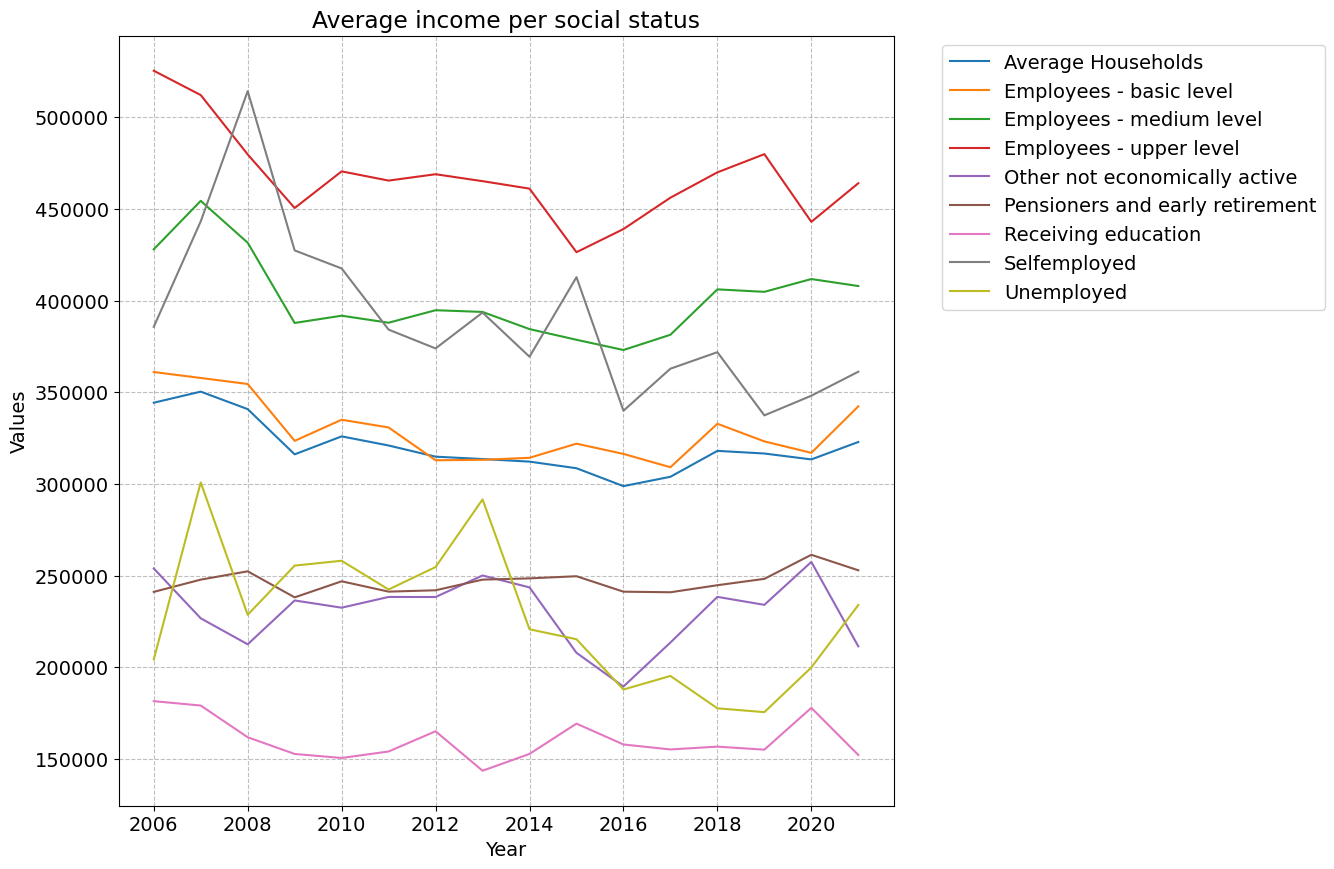

In [100]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',
          'Employees - upper level', 'Other not economically active',
          'Pensioners and early retirement', 'Receiving education', 'Selfemployed',
          'Unemployed']

# Create a single plot with a line for each group
fig, ax = plt.subplots(figsize=(10,10))
for group in groups:
    values = return_indhold_for_socio(df, group)
    ax.plot(years, values, label=group)

# Add legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Values")


plt.title("Average income per social status")
# Show the plot
plt.show()




Text(0.5, 1.0, 'Average household income')

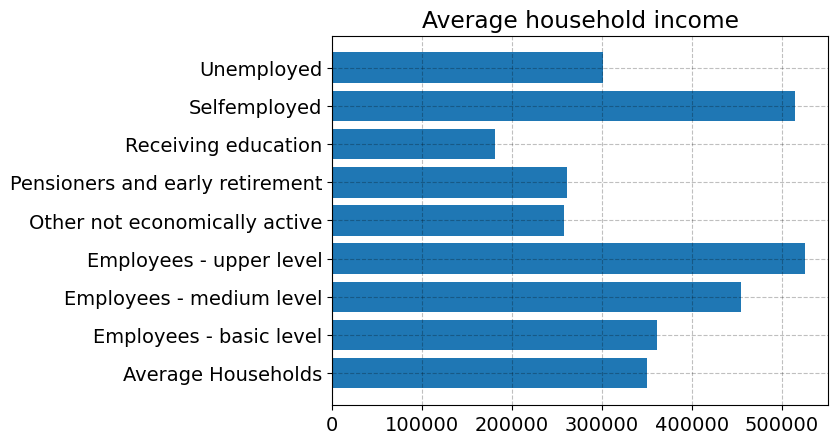

In [48]:
plt.barh(df["SOCIO"].values, df["INDHOLD"].values)
#plt.xticks(rotation=45)
plt.title("Average household income")

,SOCIO,TID,KONSUMGRP,INDHOLD
594,Average Households,2006,CONSUMPTION TOTAL,344321
233,Average Households,2007,CONSUMPTION TOTAL,350367
648,Average Households,2008,CONSUMPTION TOTAL,340824
234,Average Households,2009,CONSUMPTION TOTAL,316161
441,Average Households,2010,CONSUMPTION TOTAL,325968


In [84]:
df["SOCIO"].unique()

array(['Average Households', 'Employees - basic level',
       'Employees - medium level', 'Employees - upper level',
       'Other not economically active', 'Pensioners and early retirement',
       'Receiving education', 'Selfemployed', 'Unemployed'], dtype=object)

Jeg kan ikke få følgende til at virke, som skal bruges til et plot... 

In [49]:
# Times series plot of the Gender Gap

fig = go.Figure()

for group_name, group_data in Total_consumption1.groupby('SOCIO'):
    if group_name == 'Unemployed':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Unemployed, line=dict(color='blue', dash='dash')))
    elif group_name == 'Average Households':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Average, line=dict(color='black', dash='dash')))    
    elif group_name == 'Selfemployed':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Selfemployed, line=dict(color='green', dash='dash')))    
    elif group_name == 'Employees - upper level':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Employees_upper_level, line=dict(color='red', dash='dash')))    
    elif group_name == 'Employees - medium level':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Employees_medium_level, line=dict(color='orange', dash='dash')))    
    elif group_name == 'Employees - basic level':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Employees_basic_level, line=dict(color='purple', dash='dash')))    
    elif group_name == 'Receiving education':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Receiving_education, line=dict(color='brown', dash='dash')))    
    elif group_name == 'Pensioners and early retirement':  # add condition to change line style for OECD countries
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Pension_and_early_retirement, line=dict(color='grey', dash='dash')))    
    else:
        fig.add_trace(go.Scatter(x=Total_consumption1['TID'], y=Total_consumption1['KONSUMGRP'], name=Other_not_economically_active))

KeyError: 'SOCIO'

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

for group_name, group_data in Total_consumption1.groupby('SOCIO'):
    if group_name == 'Unemployed':
        Unemployed = 'Unemployed'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Unemployed', line=dict(color='blue', dash='dash')))
    elif group_name == 'Average Households':
        Average = 'Average Households'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Average Households', line=dict(color='black', dash='dash')))    
    elif group_name == 'Selfemployed':
        Selfemployed = 'Selfemployed'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Selfemployed', line=dict(color='green', dash='dash')))    
    elif group_name == 'Employees - upper level':
        Employees_upper_level = 'Employees - upper level'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Employees - upper level', line=dict(color='red', dash='dash')))    
    elif group_name == 'Employees - medium level':
        Employees_medium_level = 'Employees - medium level'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Employees - medium level', line=dict(color='orange', dash='dash')))    
    elif group_name == 'Employees - basic level':
        Employees_basic_level = 'Employees - basic level'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Employees - basic level', line=dict(color='purple', dash='dash')))    
    elif group_name == 'Receiving education':
        Receiving_education = 'Receiving education'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Receiving education', line=dict(color='brown', dash='dash')))    
    elif group_name == 'Pensioners and early retirement':
        Pension_and_early_retirement = 'Pensioners and early retirement'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Pensioners and early retirement', line=dict(color='grey', dash='dash')))    
    else:
        Other_not_economically_active = 'Other not economically active'
        fig.add_trace(go.Scatter(x=group_data['TID'], y=group_data['KONSUMGRP'], name='Other not economically active')) 

KeyError: 'SOCIO'

In [14]:
Total_consumption1.columns = ['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']
print(Total_consumption1.columns)

['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']
